# AULA 1:

INTRODUÇÂO
* Mostrando como o pyton funciona com a biblioteca pandas
* Importação de Arquivos 
* 




In [ ]:
print("Henrique Lima")
nome_do_filme = "totoro, o filme"
print (nome_do_filme)


Henrique Lima
totoro, o filme


In [ ]:
print(nome_do_filme)

In [ ]:
import pandas as pd


In [ ]:
 # FILMES, GENEROS, ANO
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.head()

# filmes é um 'DataFrame'.

In [ ]:
# NOTAS
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.head()

In [ ]:
# QUANTIDADE DE AVALIACOES 
avaliacoes.shape


In [ ]:
# LINHAS DE AVALIACOES
len(avaliacoes)

In [ ]:
# SOBRESCREVENDO NOME DAS COLUNAS
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()


In [ ]:
# BUSCAR AVALIACOES PARA FILME ID1
avaliacoes.query("filmeId==1")

In [ ]:
# NOTA MÁXIMA E NOTA MÍNIMA
avaliacoes.describe()

In [ ]:
# MOSTRAR APENAS UMA COLUNA

avaliacoes["nota"]

In [ ]:
# BUSCA POR MÉDIA DE FILME ID1
avaliacoes.query("filmeId==1").mean()

In [ ]:
# BUSCA POR MÉDIA DE NOTA DADA PARA FILME ID1
avaliacoes.query("filmeId==1")["nota"].mean()

3.9209302325581397

In [ ]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
display (" ------ FILMES --------")
display(filmes.head())

notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
display ( " ----------------- NOTAS ----------------")
display(notas.head())

display("Nota filme Id1:", notas.query("filmeId==1")["nota"].mean())
display("Nota filme Id2:", notas.query("filmeId==2")["nota"].mean())





In [ ]:
notas_medias_por_filme = notas.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [ ]:
filmes["nota_media"] = notas_medias_por_filme
filmes.head()

,movieId,title,genres,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.920930
2,3,Grumpier Old Men (1995),Comedy|Romance,3.431818
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3.259615
4,5,Father of the Bride Part II (1995),Comedy,2.357143


In [ ]:
# JUNTANDO COLUNA FILME ID + NOTAS
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [ ]:
# ORDENAR FILMES 
filmes_com_media.sort_values("nota", ascending = False)

,filmeId,titulo,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


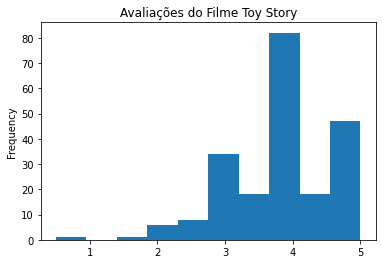

In [ ]:
# PLOTANDO GRÁFICOS DE AVALIAÇÕES ID1

notas.query("filmeId == 1")["nota"].plot(kind = "hist", title = "Avaliações do Filme Toy Story")

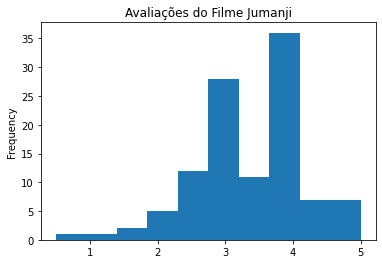

In [ ]:
# PLOTANDO GRÁFICOS DE AVALIAÇÕES ID2

notas.query("filmeId == 2")["nota"].plot(kind = "hist", title = "Avaliações do Filme Jumanji")

In [ ]:
# PLOTANDO GRÁFICOS DE AVALIAÇÕES ID1

notas.query("filmeId == 1")["nota"].plot(kind = "hist", title = "Avaliações do Filme Toy Story")

UndefinedVariableError: ignored

In [ ]:
# Desafio 1 = encontrar os 18 filmes que não tiveram avaliação 
# Desafio 2 = mudar o nome da coluna 'nota' para média após o join
# Desafio 3 = colocar o número de avaliações que os melhores filmes receberam
# Desafio 4 = arrendondar valores de notas para duas casas decimais
# Desafio 5 = descobrir os gêneros únicos 
# Desafio 6 = contar o número de cada gênero (quantos têm de drama, comédia, aventura etc)
# Desafio 7 = plotar o gráfico de aparições por gênero. Pode ser um gráfico de tipo igual a barra

# AULA 2:

In [ ]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv") #Dataframe Filmes
filmes.columns = ["filmeId", "titulo", "generos"] #Renomeando colunas do Dataframe Filmes

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true") #Dataframe Avaliacoes
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"] #Renomeando colunas do Dataframe Avaliacoes

notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean() 
total_votos_por_filme = avaliacoes.groupby("filmeId")["nota"].count() # counts the number of values in each column

filmes_com_medias = filmes.join(notas_medias_por_filme, on ="filmeId") #Juntando Dataframe filmes + media de cada filme
filmes_com_medias.columns = ["filmeId", "titulo", "generos", "nota_media"] # Renomeando coluna 'nota' para "nota_media"

filmes_com_medias_e_votos = filmes_com_medias.join(total_votos_por_filme, on="filmeId")
filmes_com_medias_e_votos.columns = ["filmeId", "titulo","generos", "nota_media", "total_votos"]
filmes_com_medias_e_votos['nota_media'] = filmes_com_medias_e_votos['nota_media'].round(2) # round a DataFrame to a variable number of decimal places.

total_filmes_por_genero = filmes_com_medias_e_votos.generos.str.get_dummies().sum() #Extrair a soma 




filmes["generos"].str.get_dummies("|") # get dumies separa os generos 


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
filmes["generos"].str.get_dummies("|").sum()  # Somar a quantidade de filmes por gêneros

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [ ]:
filmes["generos"].str.get_dummies("|").sum(axis=1) # Somar quantidade de generos por filme

0       5
1       3
2       2
3       3
4       1
       ..
9737    4
9738    3
9739    1
9740    2
9741    1
Length: 9742, dtype: int64

In [ ]:
filmes["generos"].str.get_dummies("|").sum(axis=1).value_counts()  # Somar quantidade de filmes por quantidade de gêneros

2     3218
1     2851
3     2338
4      987
5      271
6       63
7       12
10       1
8        1
dtype: int64

In [ ]:
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending = False) # Ordenação pela quantidade de filmes por gênero

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [ ]:
filmes.index   # indice do dataframe filmes

RangeIndex(start=0, stop=9742, step=1)

In [ ]:
filmes.values

array([[1, 'Toy Story (1995)',
        'Adventure|Animation|Children|Comedy|Fantasy'],
       [2, 'Jumanji (1995)', 'Adventure|Children|Fantasy'],
       [3, 'Grumpier Old Men (1995)', 'Comedy|Romance'],
       ...,
       [193585, 'Flint (2017)', 'Drama'],
       [193587, 'Bungo Stray Dogs: Dead Apple (2018)',
        'Action|Animation'],
       [193609, 'Andrew Dice Clay: Dice Rules (1991)', 'Comedy']],
      dtype=object)

In [ ]:
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending = False).index  # Índices Ordenados

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [ ]:
filmes["generos"].str.get_dummies("|").sum().sort_index() # Índices ordenados em ordem alfabética

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [ ]:
filmes["generos"].str.get_dummies("|").sum().sort_index(ascending = False)

Western                167
War                    382
Thriller              1894
Sci-Fi                 980
Romance               1596
Mystery                573
Musical                334
IMAX                   158
Horror                 978
Film-Noir               87
Fantasy                779
Drama                 4361
Documentary            440
Crime                 1199
Comedy                3756
Children               664
Animation              611
Adventure             1263
Action                1828
(no genres listed)      34
dtype: int64

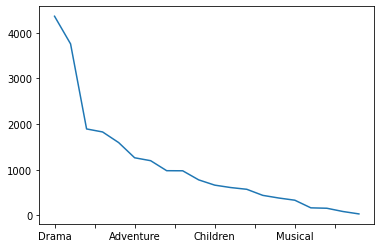

In [ ]:
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending = False).plot() # Plotando um gráfico

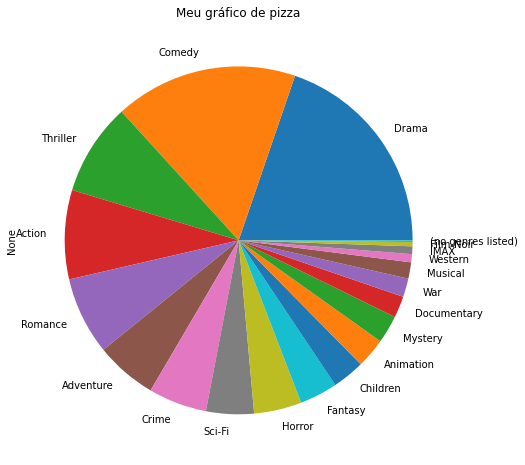

In [ ]:
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending = False).plot(kind= "pie", title="Meu gráfico de pizza", figsize=[8,8])


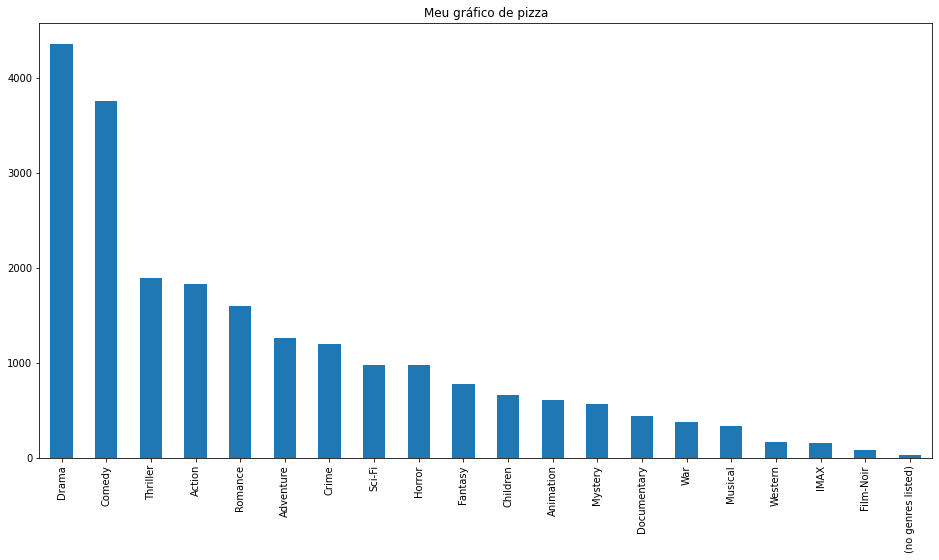

In [ ]:
# FILMES POR CATEGORIA #
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending = False).plot(kind= "bar", title="Meu gráfico de pizza", figsize=[16,8])


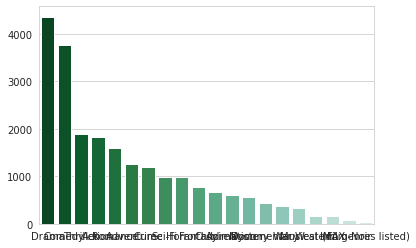

In [ ]:
import seaborn as sns
sns.set_style("whitegrid") # Inserindo Grid

filmes_por_genero = filmes["generos"].str.get_dummies("|").sum().sort_values(ascending = False)

grafico = sns.barplot(x= filmes_por_genero.index,
                      y= filmes_por_genero.values,
                      palette = sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 5))

# DESAFIO 1 - Rotacionar os thicks (nome dos gêneros) em 45º - passar argumentospara biblioteca sns.barplot


3.9209302325581397


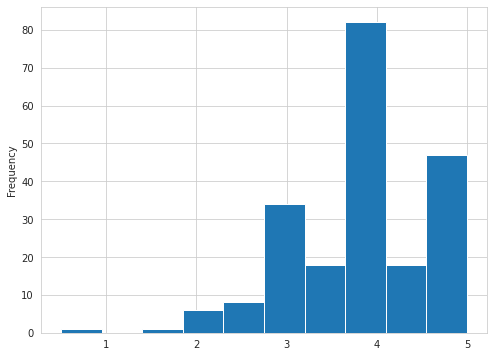

In [ ]:
notas_do_filme_1 = notas.query("filmeId==1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind="hist", figsize=[8,6])  #PLOTANDO NOTAS DO FILME 1

3.4318181818181817


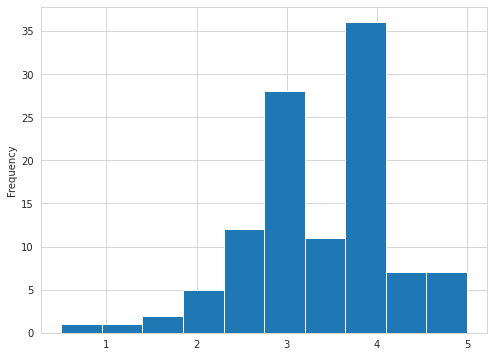

In [ ]:
notas_do_filme_2 = notas.query("filmeId==2")["nota"]
print(notas_do_filme_2.mean())
notas_do_filme_2.plot(kind="hist", figsize=[8,6])  #PLOTANDO NOTAS DO FILME 2

In [ ]:
notas_do_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [ ]:
notas_do_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [ ]:
notas.groupby("filmeId").mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [ ]:
filmes_com_medias.sort_values("nota_media", ascending = False)[2450:2500]

,filmeId,titulo,generos,nota_media
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


In [ ]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind="hist")  
  return notas_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

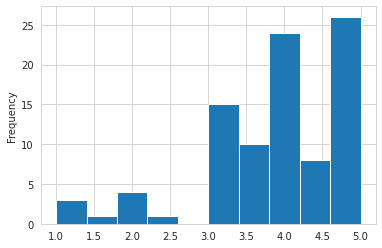

In [ ]:
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

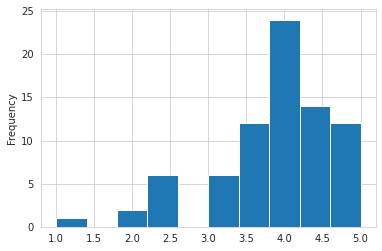

In [ ]:
plot_filme(46578) #Plotando gráfico describe do filme com Id 46578 utilizado na função plot_filme(n)

#Desafio2 : Comparar outros filmes com notas próximas com distribuições diferentes 

In [ ]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind="hist")  
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

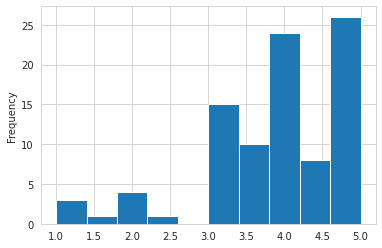

In [ ]:
plot_filme(919)

# AULA 3:
Nova Base  - Imdb

In [ ]:
import pandas as pd

imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
imdb["color"].unique()  # cores dos filmes da series "colour"

array(['Color', nan, ' Black and White'], dtype=object)

In [ ]:
imdb["color"].value_counts()  # quantidade de cada cor

Color               4815
 Black and White     209
Name: color, dtype: int64

In [ ]:
imdb["color"].value_counts(normalize=True) # quantidade de filmes preenchidos em cada por por porcentagem

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [ ]:
imdb["director_name"].value_counts() # Quantosfilmes cada diretor fez.

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
                    ..
David Silverman      1
Ray Lawrence         1
Clive Barker         1
Dan Fogelman         1
Allan Arkush         1
Name: director_name, Length: 2398, dtype: int64

In [ ]:
imdb["director_name"]  #Cada diretor 

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
5038          Scott Smith
5039                  NaN
5040     Benjamin Roberds
5041          Daniel Hsia
5042             Jon Gunn
Name: director_name, Length: 5043, dtype: object

In [ ]:
imdb["director_name"].value_counts().tail(40)

Patrick Gilmore            1
Michel Orion Scott         1
Molly Bernstein            1
Paul Tibbitt               1
Sergey Bondarchuk          1
Mennan Yapo                1
Steve Carver               1
Ruggero Deodato            1
Andrucha Waddington        1
Jason Bateman              1
Christophe Ali             1
Craig Johnson              1
Stephen Carpenter          1
Michael Patrick King       1
Paul Bartel                1
Jonathan Kesselman         1
Bo Welch                   1
Chuan Lu                   1
Christopher M. Bessette    1
Wallace Wolodarsky         1
Jim Jarmusch               1
Paul Bolger                1
Mark Sandrich              1
Allen Hughes               1
Michael Kang               1
Shane Carruth              1
Rupert Sanders             1
Bill Melendez              1
Jay Alaimo                 1
Bill Muir                  1
Richard Dutcher            1
Jon Stewart                1
Melville Shavelson         1
John Patrick Shanley       1
Danny Perez   

In [ ]:
imdb["num_critic_for_reviews"]

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [ ]:
imdb["num_critic_for_reviews"].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

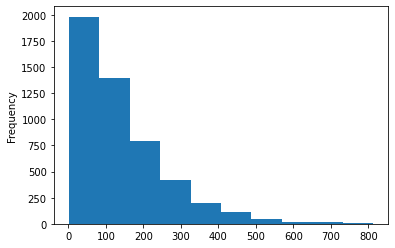

In [ ]:
imdb["num_critic_for_reviews"].plot(kind="hist")  #plotando histograma

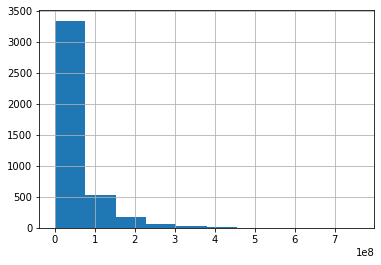

In [ ]:
imdb["gross"].hist()

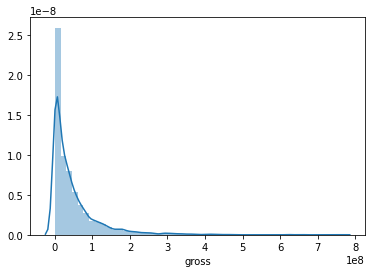

In [ ]:
import seaborn as sns

sns.distplot(imdb["gross"])

In [ ]:
imdb.sort_values("gross",ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


In [ ]:
imdb.sort_values("gross",ascending=False).sample(5)  #Coletando filmes aleatórios para análise

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2296,Color,Les Mayfield,72.0,83.0,10.0,69.0,Susie Essman,688.0,8326035.0,Action|Comedy|Crime,Miguel Ferrer,The Man,21933,1019,Gigi Rice,2.0,buddy comedy|criminal|gun smuggling|mistaken i...,http://www.imdb.com/title/tt0399327/?ref_=fn_t...,76.0,English,Germany,PG-13,33000000.0,2005.0,99.0,5.5,1.85,676
3292,Color,Ben Younger,132.0,120.0,46.0,701.0,Nia Long,14000.0,16938179.0,Crime|Drama|Thriller,Vin Diesel,Boiler Room,41313,17336,Herbert Russell,3.0,career|casino|judge|stock|stock broker,http://www.imdb.com/title/tt0181984/?ref_=fn_t...,246.0,English,USA,R,8000000.0,2000.0,826.0,7.0,1.85,0
4102,Color,Todd Solondz,148.0,134.0,377.0,812.0,Jon Lovitz,22000.0,3000000.0,Comedy|Drama,Philip Seymour Hoffman,Happiness,55329,36859,Dylan Baker,9.0,ensemble cast|episodic structure|satire|social...,http://www.imdb.com/title/tt0147612/?ref_=fn_t...,499.0,English,USA,NaN,3000000.0,1998.0,11000.0,7.8,1.85,0
1539,Color,David Wain,163.0,98.0,136.0,833.0,Lauren Ambrose,1000.0,17225675.0,Comedy,Justin Theroux,Wanderlust,62198,4151,Joe Lo Truglio,2.0,childbirth|female frontal nudity|nude protest|...,http://www.imdb.com/title/tt1655460/?ref_=fn_t...,139.0,English,USA,R,NaN,2012.0,945.0,5.6,1.85,0
493,Color,Rob Cohen,61.0,114.0,357.0,366.0,Viggo Mortensen,13000.0,32885565.0,Action|Adventure|Drama|Thriller,Sylvester Stallone,Daylight,53132,25126,Amy Brenneman,0.0,collapsing tunnel|explosion|new jersey|tunnel|...,http://www.imdb.com/title/tt0116040/?ref_=fn_t...,101.0,English,USA,PG-13,80000000.0,1996.0,10000.0,5.8,1.85,0


In [ ]:
# Perguntas Gerais
 - aventura tem nota melhor que comédia?
  - diretor com mais filmes tem nota melhor? tem mais faturamento?
  - as respostas são especificas para amostra ou para o mundo?
- quais correlações existem entre os dados
- budget x gross (orçamento x faturamento)
- title_yearcom algo?


In [ ]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
len (color_or_bw)

5024

In [ ]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw["color_0_ou_1"].value_counts()
color_or_bw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [ ]:
color_or_bw["color_0_ou_1"].value_counts()  #Filmes Coloridos x Filmes Preto e Branco

1    4815
0     209
Name: color_0_ou_1, dtype: int64

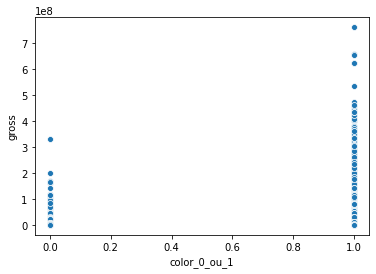

In [ ]:
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")

In [ ]:
color_or_bw.groupby("color").mean()  # média de faturamento do colorido é maior que o do preto e branco

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
color,,,,,,,,,,,,,,,,,
Black and White,129.004785,112.253589,1251.941748,392.354067,3925.985646,3.245702e+07,95579.679426,5903.354067,1.411483,353.669856,1.907756e+07,1984.029126,1009.511962,7.227273,1.902157,4626.028708,0.0
Color,141.047609,107.042908,663.919423,657.093867,6640.256032,4.902619e+07,83405.573624,9836.873105,1.369561,270.034404,4.075648e+07,2003.248197,1683.981886,6.409533,2.231912,7666.744133,1.0


In [ ]:
color_or_bw.groupby("color").mean()["imdb_score"] # média de avaliações pw x colorido 

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [ ]:
color_or_bw.groupby("color").median()["imdb_score"] # mediana de avaliações pw x colorido 

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

# Desafio 1 = Bloxplot da média do colorido e do preto e branco 

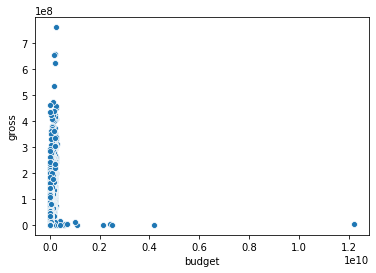

In [ ]:
budget_gross = imdb[["budget", "gross"]].dropna().query("budget > 0 | gross > 0") #dropna = remove valores faltantantes 

sns.scatterplot( x= "budget", y="gross", data= budget_gross)  # quantidade de gasto x faturamento de um filme

In [ ]:
imdb.sort_values("budget", ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000,1.0
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000,1.0
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607,1.0
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000,1.0
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,Color,Tadeo Garcia,NaN,84.0,5.0,12.0,Michael Cortez,21.0,NaN,Drama,Tatiana Suarez-Pico,On the Downlow,156,62,Eric Ambriz,2.0,gang initiation|gunplay|hazing|latino|shakespe...,http://www.imdb.com/title/tt0390323/?ref_=fn_t...,3.0,English,USA,NaN,NaN,2004.0,20.0,6.1,NaN,22,1.0
5032,Color,Ash Baron-Cohen,10.0,98.0,3.0,152.0,Stanley B. Herman,789.0,NaN,Crime|Drama,Peter Greene,Bang,438,1186,James Noble,1.0,corruption|homeless|homeless man|motorcycle|ur...,http://www.imdb.com/title/tt0109266/?ref_=fn_t...,14.0,English,USA,NaN,NaN,1995.0,194.0,6.4,NaN,20,1.0
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,1.0
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,1.0


In [ ]:
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [ ]:
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1.0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,1.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,1.0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,1.0
